In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score, mean_squared_error

In [2]:
course = pd.read_csv("course_lead_scoring.csv") 
course.shape

(1462, 9)

In [3]:
course.head(10)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
5,events,manufacturing,1,59904.0,NaN,africa,6,0.83,1
6,social_media,technology,0,51283.0,NaN,middle_east,2,0.57,0
7,social_media,NaN,5,62975.0,student,europe,4,0.62,1
8,referral,healthcare,4,38648.0,unemployed,south_america,2,0.86,1
9,paid_ads,other,3,59866.0,student,australia,3,0.43,1


In [4]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [5]:
course1 = course.copy()

In [6]:
course1.isna().any()

lead_source                  True
industry                     True
number_of_courses_viewed    False
annual_income                True
employment_status            True
location                     True
interaction_count           False
lead_score                  False
converted                   False
dtype: bool

In [7]:
course1.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [8]:
course1.lead_source = course1.lead_source.fillna('NA')
course1.industry = course1.industry.fillna('NA')
course1.annual_income = course1.annual_income.fillna(0)
course1.employment_status = course1.employment_status.fillna('NA')
course1.location = course1.location.fillna('NA')

In [9]:
course1.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

## Question 1

In [11]:
course1['industry'].mode()

0    retail
Name: industry, dtype: object

## Ans 1 - retail

## Question 2

In [14]:
course2 = course1.copy()
course2 = course2.drop(['lead_source', 'industry', 'employment_status', 'location', 'converted'], axis=1)
course2.describe()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,2.031464,52472.172367,2.976744,0.506108
std,1.449717,24254.347030,1.681564,0.288465
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,44097.250000,2.000000,0.262500
50%,2.000000,57449.500000,3.000000,0.510000
75%,3.000000,68241.000000,4.000000,0.750000
max,9.000000,109899.000000,11.000000,1.000000


In [15]:
course2.corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


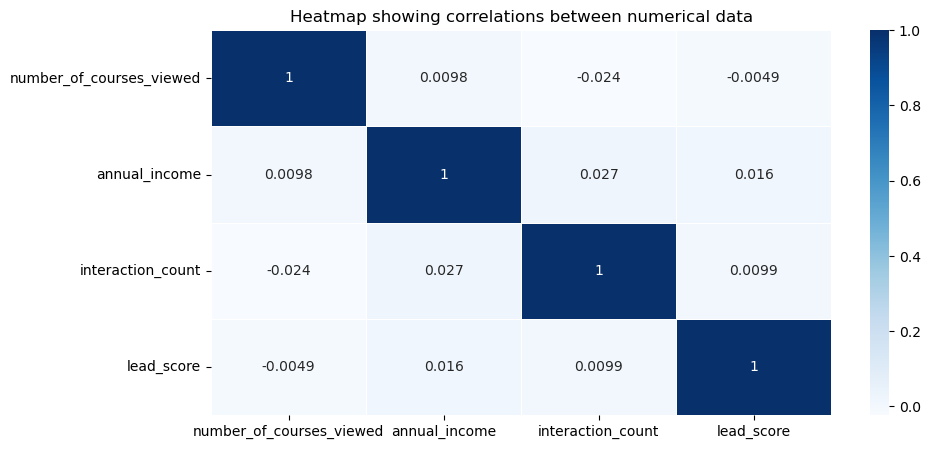

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(course2.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [17]:
course2.corr().unstack().sort_values(ascending = False)[4:16]

annual_income             interaction_count           0.027036
interaction_count         annual_income               0.027036
annual_income             lead_score                  0.015610
lead_score                annual_income               0.015610
interaction_count         lead_score                  0.009888
lead_score                interaction_count           0.009888
number_of_courses_viewed  annual_income               0.009770
annual_income             number_of_courses_viewed    0.009770
number_of_courses_viewed  lead_score                 -0.004879
lead_score                number_of_courses_viewed   -0.004879
number_of_courses_viewed  interaction_count          -0.023565
interaction_count         number_of_courses_viewed   -0.023565
dtype: float64

## Ans 2 - 'annual_income' vs 'interaction_cout'

## Split the data

In [20]:
data_class = course1.copy()
#data_class = data_class.drop('converted', axis=1)
data_class

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25,1


In [21]:
SEED = 42

In [22]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)
assert len(data_class) == (len(df_train) + len(df_val) + len(df_test))

In [23]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

## Question 3

In [27]:
def calculate_mi(series):
    return round(mutual_info_score(series, df_train.converted), 2)

In [28]:
cat = ['lead_source', 'industry', 'employment_status', 'location']

In [29]:
df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
lead_source,0.04
industry,0.01
employment_status,0.01
location,0.00


## Ans 3 - 'lead_source'

## Question 4

In [32]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [33]:
model = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0, random_state=SEED)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [34]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

In [35]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f'Accuracy = {accuracy}')

Accuracy = 0.76


## Ans 4 - Accuracy = 0.76

## Question 5

In [38]:
features = df_train.columns.to_list()
features

['lead_source',
 'industry',
 'number_of_courses_viewed',
 'annual_income',
 'employment_status',
 'location',
 'interaction_count',
 'lead_score',
 'converted']

In [39]:
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0, random_state=SEED)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [40]:
scores

,eliminated_feature,accuracy,difference
0,lead_source,0.764505,-0.004505
1,industry,0.764505,-0.004505
2,number_of_courses_viewed,0.703072,0.056928
3,annual_income,1.000000,-0.240000
4,employment_status,0.764505,-0.004505
5,location,0.757679,0.002321
6,interaction_count,0.744027,0.015973
7,lead_score,0.761092,-0.001092
8,converted,0.699659,0.060341


In [41]:
#min_diff = scores.difference.min()
#scores[scores.difference == min_diff]

## Ans 5 - 'lead_score'

## Question 6

In [44]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=SEED)

In [45]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [46]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [47]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [48]:
scores = {}
for alpha in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', max_iter=1000, C=alpha, random_state=SEED)
    model.fit(X_train, y_train)
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_pred = model.predict(X_val)
#    score = np.round(accuracy_score(y_val, y_pred), 3)
    score = accuracy_score(y_val, y_pred)
    scores[alpha] = np.round(score, 3)
    print(f'alpha = {alpha}:\t Accuracy = {score}')

alpha = 0.01:	 Accuracy = 0.7679180887372014
alpha = 0.1:	 Accuracy = 0.757679180887372
alpha = 1:	 Accuracy = 0.757679180887372
alpha = 10:	 Accuracy = 0.757679180887372
alpha = 100:	 Accuracy = 0.757679180887372


In [49]:
scores

{0.01: 0.768, 0.1: 0.758, 1: 0.758, 10: 0.758, 100: 0.758}

In [88]:
## Ans 6 - 0.01